### Importing packages

In [1]:
from utils.clustering import *
import pandas as pd

from utils.preprocessing import *
from utils.plotting import *
from utils.anomaly_detection import *

In [2]:
plt.style.use('default')

plt.rcParams.update({
    'font.size': 16,
    'axes.linewidth': 2,
    'axes.titlesize': 20,
    'axes.edgecolor': 'black',
    'axes.labelsize': 20,
    'axes.grid': True,
    'lines.linewidth': 1.5,
    'lines.markersize': 6,
    'figure.figsize': (15, 6),
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'font.family': 'Arial',
    'legend.fontsize': 13,
    'legend.framealpha': 1,
    'legend.edgecolor': 'black',
    'legend.shadow': False,
    'legend.fancybox': True,
    'legend.frameon': True,
})

### Importing dataset

In [3]:
df = pd.read_csv("datasets/sensors2/reducedDF.csv")
df

,PC1,PC2
0,-2.122777,0.277135
1,-2.233705,0.206017
2,-2.241807,0.142868
3,-2.105496,0.092320
4,-1.866048,0.051282
...,...,...
3981,-1.273627,-0.011049
3982,-1.166257,0.004097
3983,-1.286239,0.089486
3984,-1.705114,0.292003


### Creating and intializing the Gaussian Mixture Model class

In [4]:
gmm = GMM(df)

### The model selection concerns both the covariance type and the number of components in the model. Therefore, we must specify the max number of components in order to classify each group using the BIC criterium for 4 different scores.

100%|██████████| 4/4 [00:11<00:00,  2.85s/it]


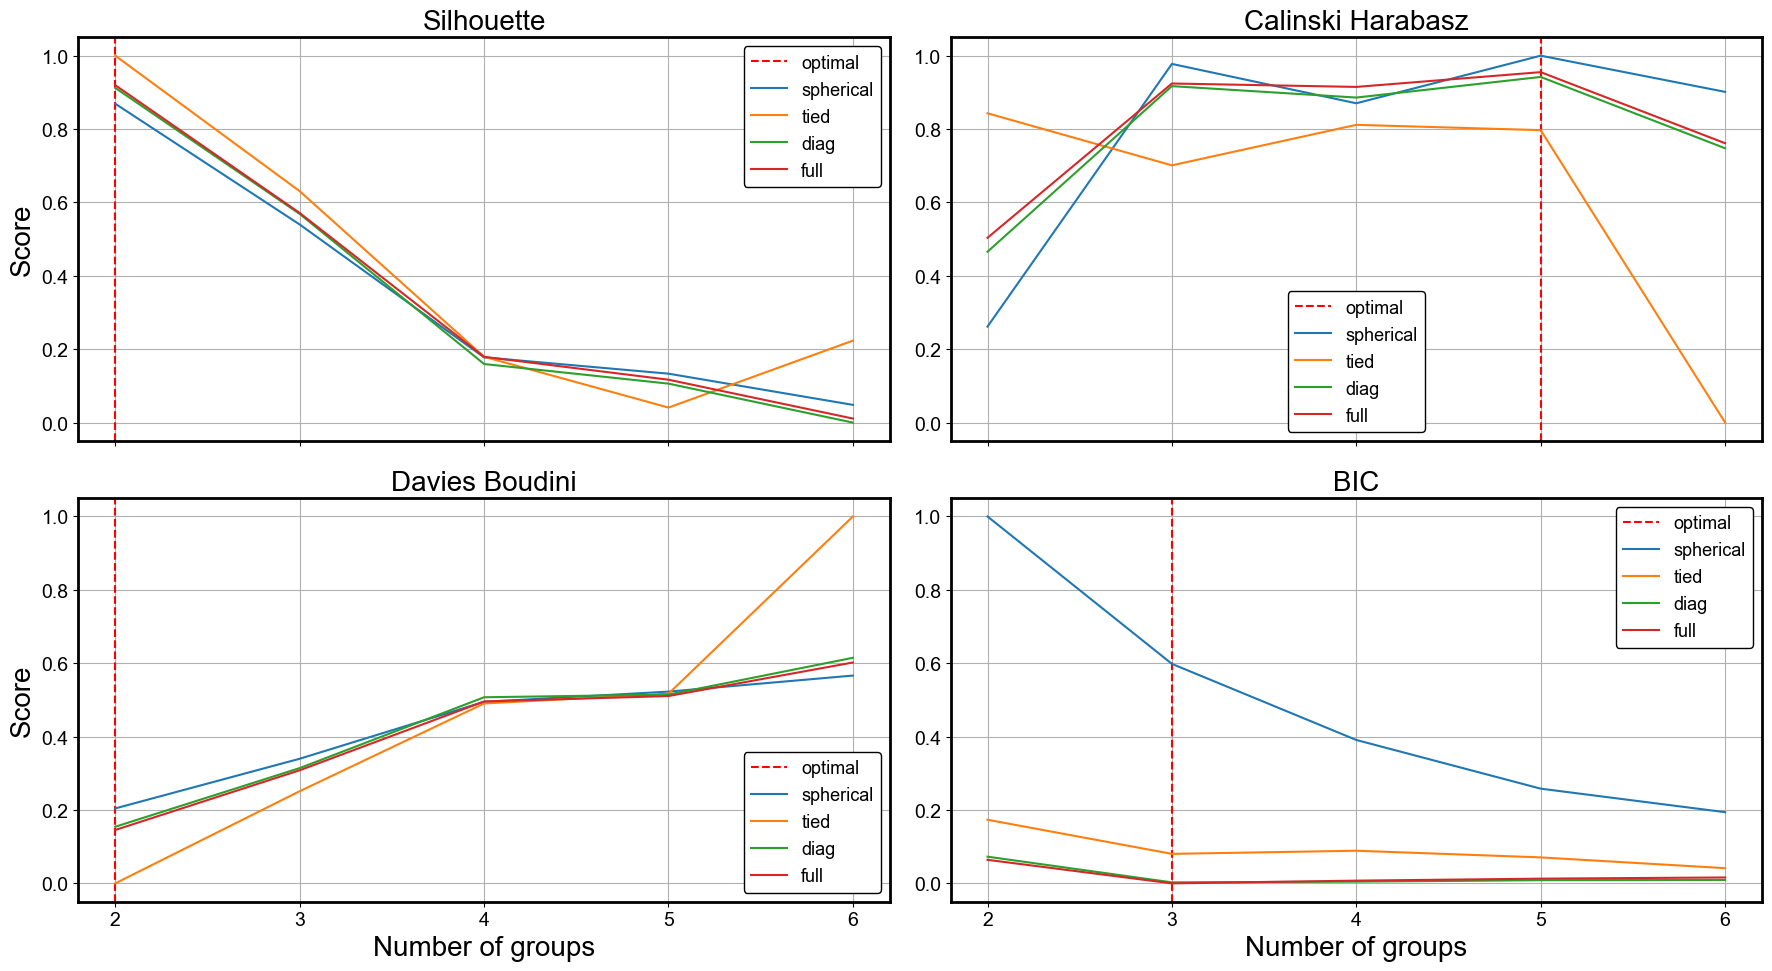

In [5]:
gmm.criterion_analysis(n_clusters= 6)

### In that case, the model with 2 components and tied covariance is selected.

In [6]:
gmm.create_model("tied", n_clusters=2)

### Now we can use the clustering method which predicts the data of a give dataframe. The method returns a new dataframe, containing the group and score for each data point.

In [7]:
distribution = gmm.clustering(df)
distribution

,PC1,PC2,cluster,scores
0,-2.122777,0.277135,0,0.944404
1,-2.233705,0.206017,0,0.951397
2,-2.241807,0.142868,0,0.959088
3,-2.105496,0.092320,0,0.970959
4,-1.866048,0.051282,0,0.984052
...,...,...,...,...
3981,-1.273627,-0.011049,0,0.999274
3982,-1.166257,0.004097,0,0.999912
3983,-1.286239,0.089486,0,0.995968
3984,-1.705114,0.292003,0,0.957798


### Since we have a 2D dataframe, we plot the distribuition using the 'cluster' column

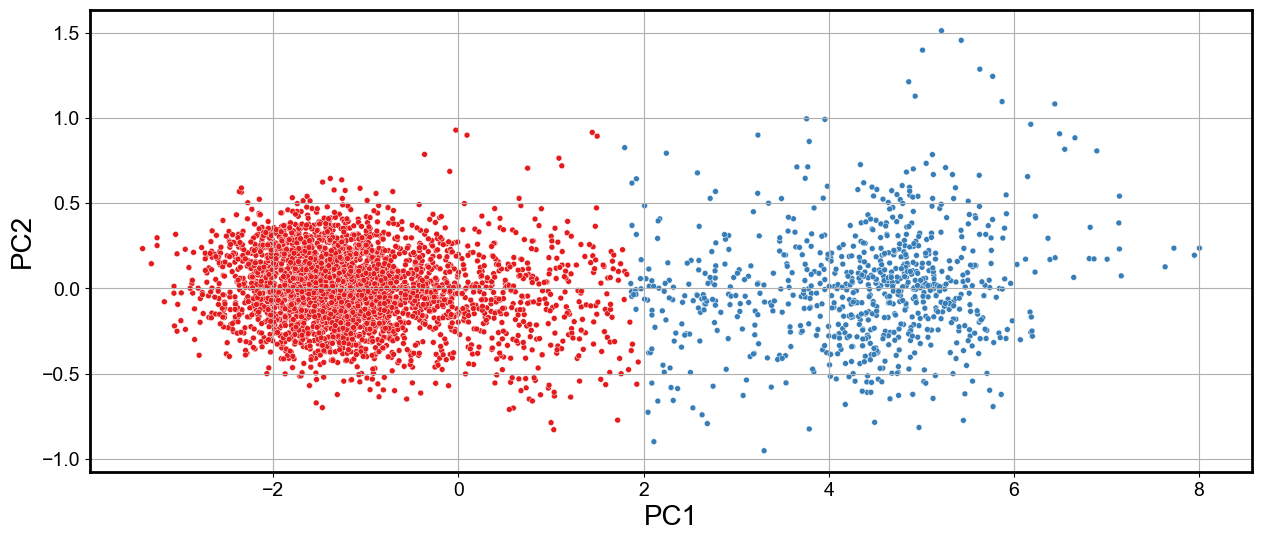

In [8]:
sns.scatterplot(data=distribution, x='PC1', y='PC2', size = 1, hue = 'cluster', palette='Set1', legend = False)
plt.show()

### We can also plot the score distribution using the 'scores' column

In [9]:
fig = px.scatter(distribution, x = 'PC1', y = 'PC2', color = 'scores')
fig.show()

### As we can see, the yellow or dense points, are concentrated in the middle of the clusters, and the farther we go from the denser regions, the color scale changes to blue. Therefore, we can use this information to classify outliers.

### The clustering method has a parameter that we can use to identify these points, it defines the points that have the score below the threshold parameter as outlier.

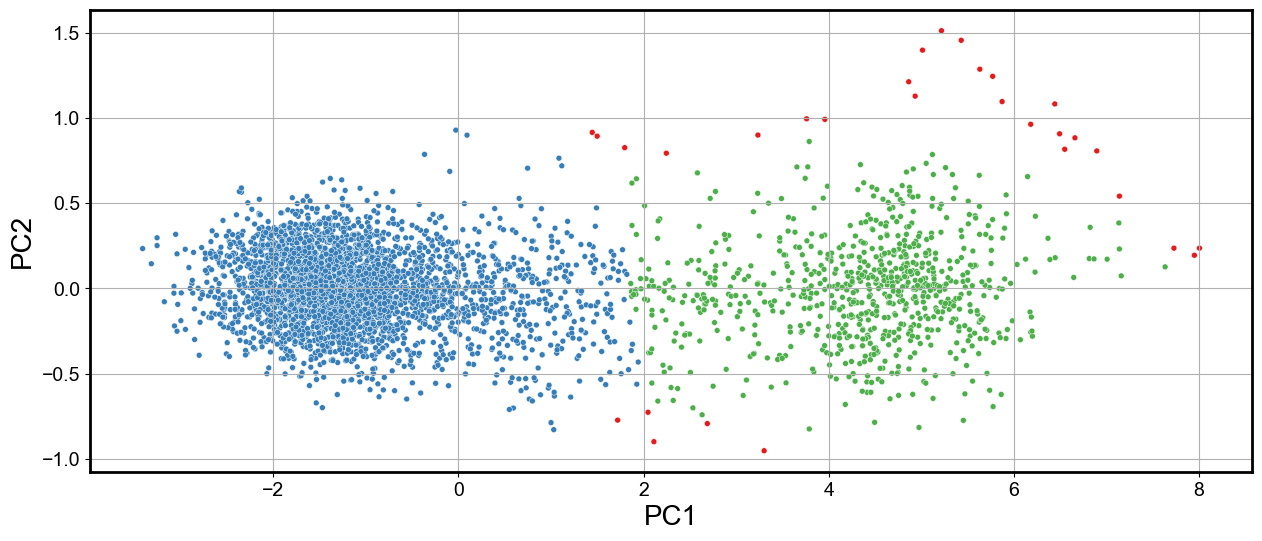

In [10]:
distribution = gmm.clustering(df, prob_threshold=0.6)
sns.scatterplot(data=distribution, x='PC1', y='PC2', size = 1, hue = 'cluster', palette='Set1', legend = False)
plt.show()

### The parameter works by separating the points where the model is uncertain in which group it belongs to. In the example above, all the points that have less than 60% chance of belong to a certain group, are classified as an outlier. In order to separate these points, a new group is created (cluster -1). 

In [11]:
outliers = distribution[distribution['cluster']  == -1]
outliers

,PC1,PC2,cluster,scores
862,1.498819,0.892736,-1,0.490001
863,1.445310,0.915008,-1,0.477295
1600,2.688628,-0.792805,-1,0.586004
1601,2.048214,-0.726593,-1,0.585446
1819,1.796274,0.825386,-1,0.532791
1820,2.246081,0.792916,-1,0.588296
2259,1.719753,-0.772691,-1,0.578885
2281,3.958227,0.991232,-1,0.548463
2282,3.235231,0.899223,-1,0.594304
3249,2.111625,-0.898914,-1,0.473330


### We can be more accurate by tweeking the probability threshold.

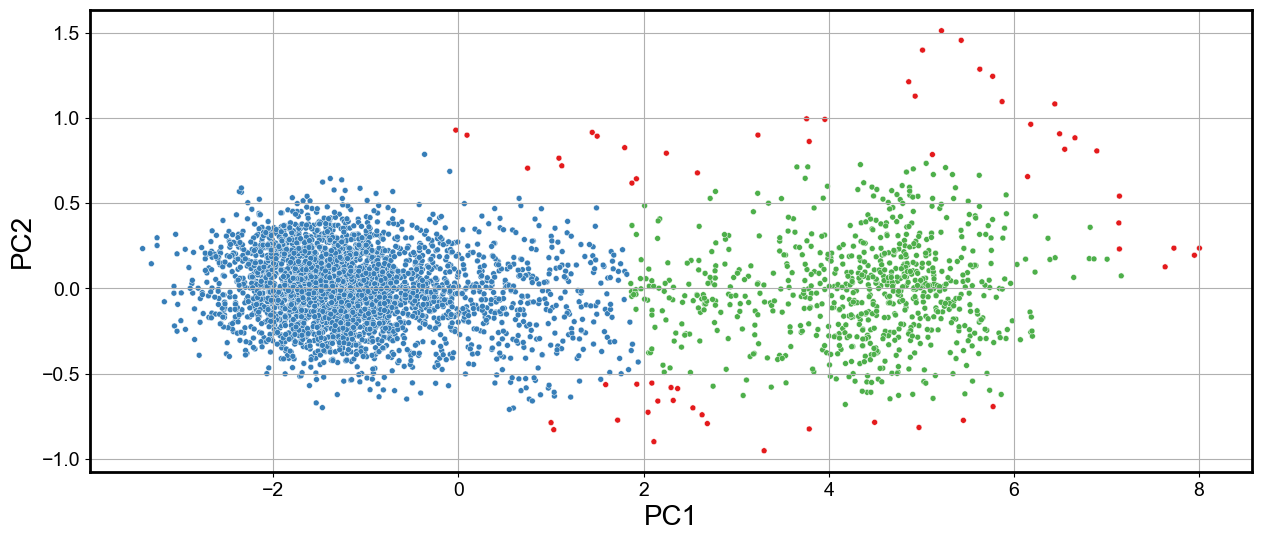

In [12]:
new_distribution = gmm.clustering(df, prob_threshold=0.70)
sns.scatterplot(data=new_distribution, x='PC1', y='PC2', size = 1, hue = 'cluster', palette='Set1', legend = False)
plt.show()